# Vykreslení funkce i její derivace

Nejprve musíme provést import všech potřebných knihoven z projektu Incanter

In [10]:
(ns simple-plot
  (:use (incanter core stats charts symbolic optimize)))

Pomocná funkce, která nám umožní zjednodušit zobrazení grafů v Jupyter Notebooku

In [3]:
(defn display
    [chart]
    (.createBufferedImage chart 640 480))

#'simple-plot/display

U vykreslení derivace funkce se na chvíli zastavme. Pokusme se například vykreslit derivaci funkce sinus, a to v rozsahu 0 až π. Vykreslení samotné funkce sinus je až triviálně jednoduché:

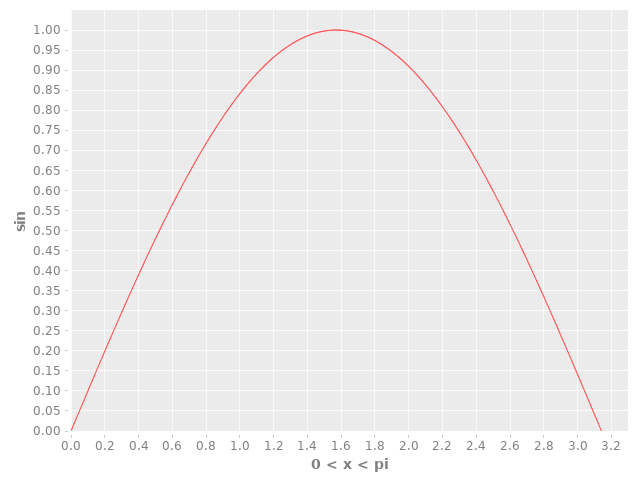

In [4]:
(def pi java.lang.Math/PI)
 
(display (function-plot sin 0 pi))

Derivací funkce sinus by měl být kosinus, o čemž se můžeme přesvědčit velmi snadno:

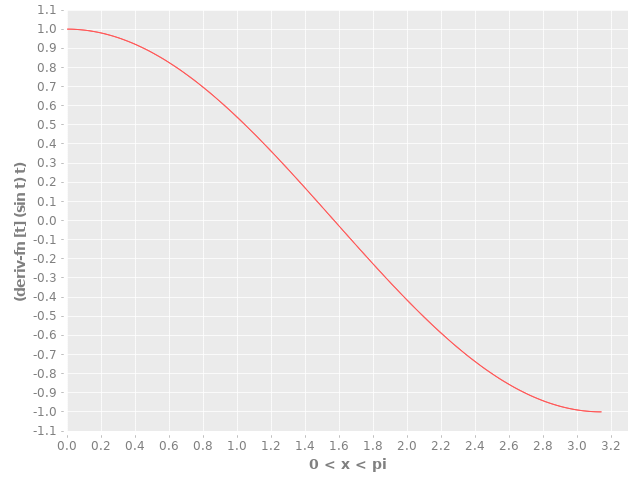

In [5]:
(display (function-plot (deriv-fn [t] (sin t) t) 0 pi))

Nyní můžeme oba průběhy vykreslit v jediném grafu:

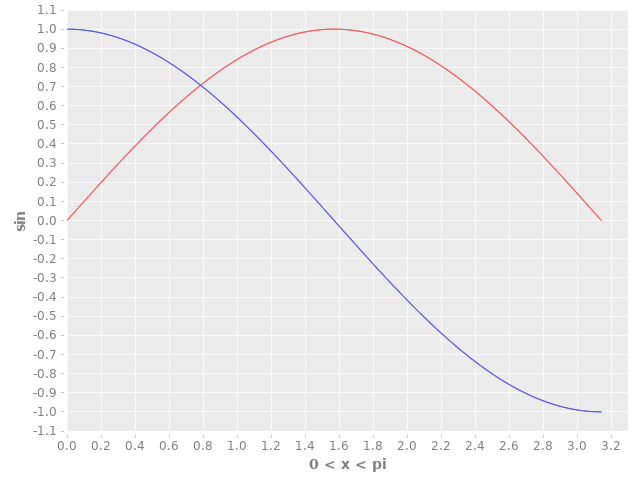

In [7]:
(display (doto (function-plot sin 0 pi)
               (add-function (deriv-fn [t] (sin t) t) 0 pi)))

Pro vykreslení derivace funkce sinc bude lepší využít numerický výpočet derivace prováděný s využitím funkce nazvané derivative. Podívejme se na jednoduchý příklad, v němž opět nadefinujeme sinc a následně průběh této funkce zobrazíme současně s její derivací:

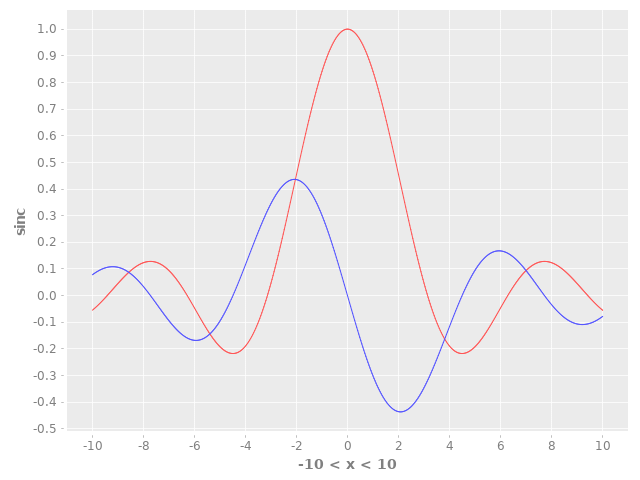

In [11]:
(defn sinc
    [t]
    (/ (sin t) t))
 
(display
  (doto (function-plot sinc -10 10)
        (add-function (derivative sinc) -10 10)))

Funkci derivative, s níž jsme se seznámili v předchozím textu, je možné předat nepovinný parametr pojmenovaný :dx. Tímto parametrem se specifikuje (zjednodušeně řečeno) x-ová vzdálenost mezi dvěma body na funkci v místě, kde se počítá sklon (směrnice tečny) funkce, tj. její hodnota derivace. Výchozí hodnota :dx je nastavena na 0.0001, ale můžete si snadno vyzkoušet, co se stane ve chvíli, kdy bude hodnota příliš velká a kdy se tedy sklon bude počítat na příliš vzdálených bodech (s ohledem na to, s jakou frekvencí funkce kmitá):

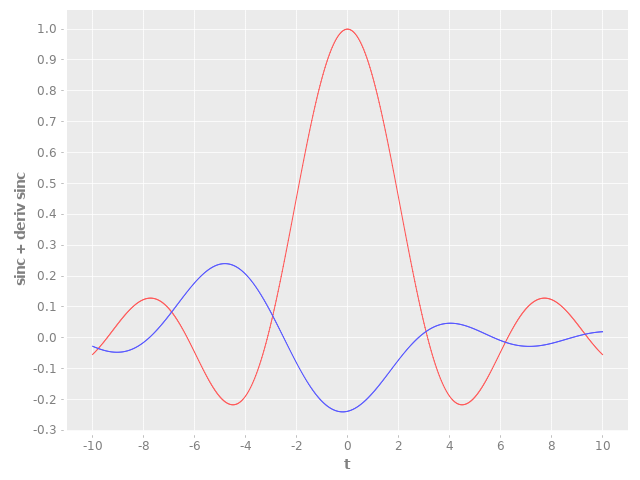

In [13]:
(display
  (doto (function-plot sinc -10 10 :x-label "t" :y-label "sinc + deriv sinc")
        (add-function (derivative sinc :dx 5) -10 10)))

Pro ještě lepší přehled o vlivu :dx na přesnost výpočtů si ukažme graf obsahující mj. i čtyři vypočtené průběhy derivace funkce sinc. První tři průběhy s :dx postupně nastavenou na 0.0001, 1/2 a 1 lze ještě považovat za prakticky dostatečně přesné výpočty derivace, ovšem poslední průběh (fialový) již v žádném případě skutečné derivaci neodpovídá:

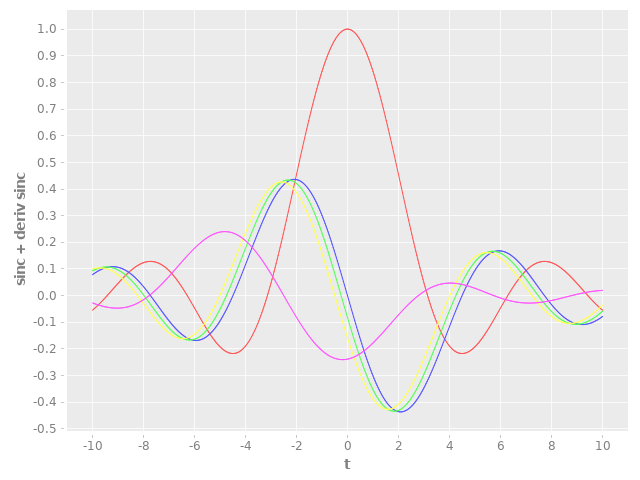

In [14]:
(display
    (doto (function-plot sinc -10 10 :x-label "t" :y-label "sinc + deriv sinc")
          (add-function (derivative sinc) -10 10)
          (add-function (derivative sinc :dx 1/2) -10 10)
          (add-function (derivative sinc :dx 1) -10 10)
          (add-function (derivative sinc :dx 5) -10 10)))